In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/signateコンペ/table自動車価格/train.csv')
df.set_index('id', inplace=True)
df.head()

,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
id,,,,,,,,,,,,,,,
0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587
1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724
2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931
3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553
4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27532 entries, 0 to 27531
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   region        27532 non-null  object
 1   year          27532 non-null  int64 
 2   manufacturer  27532 non-null  object
 3   condition     27532 non-null  object
 4   cylinders     27532 non-null  object
 5   fuel          26293 non-null  object
 6   odometer      27532 non-null  int64 
 7   title_status  27076 non-null  object
 8   transmission  27532 non-null  object
 9   drive         27532 non-null  object
 10  size          27532 non-null  object
 11  type          27076 non-null  object
 12  paint_color   27532 non-null  object
 13  state         24228 non-null  object
 14  price         27532 non-null  int64 
dtypes: int64(3), object(12)
memory usage: 3.4+ MB


# 数値変数はyear, odometer, priceのみで他はカテゴリー変数

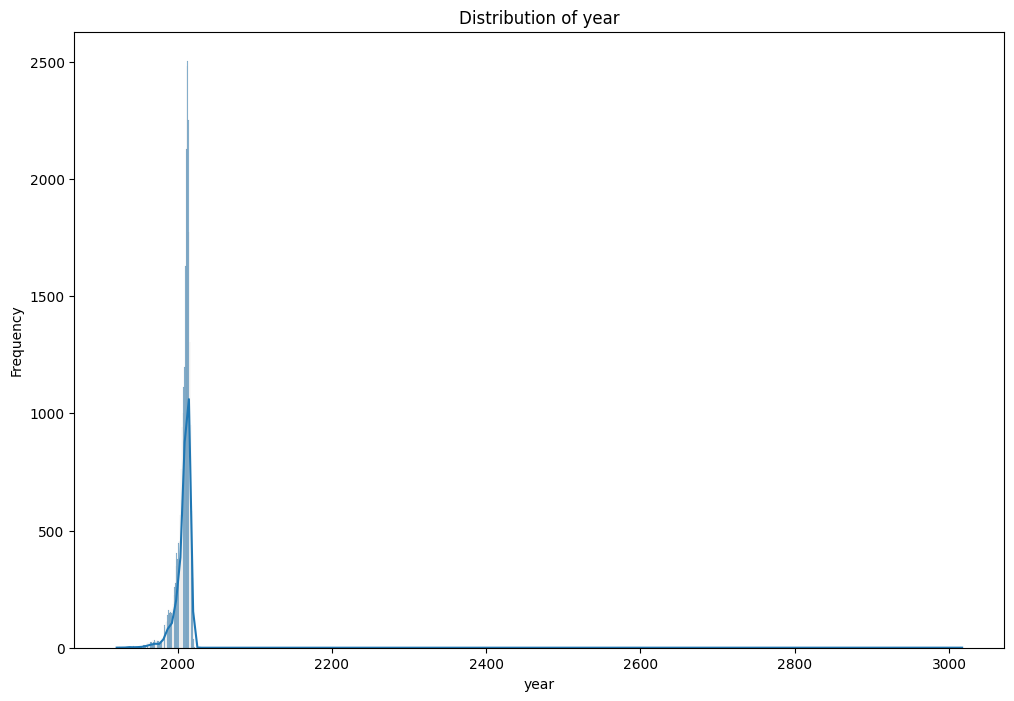

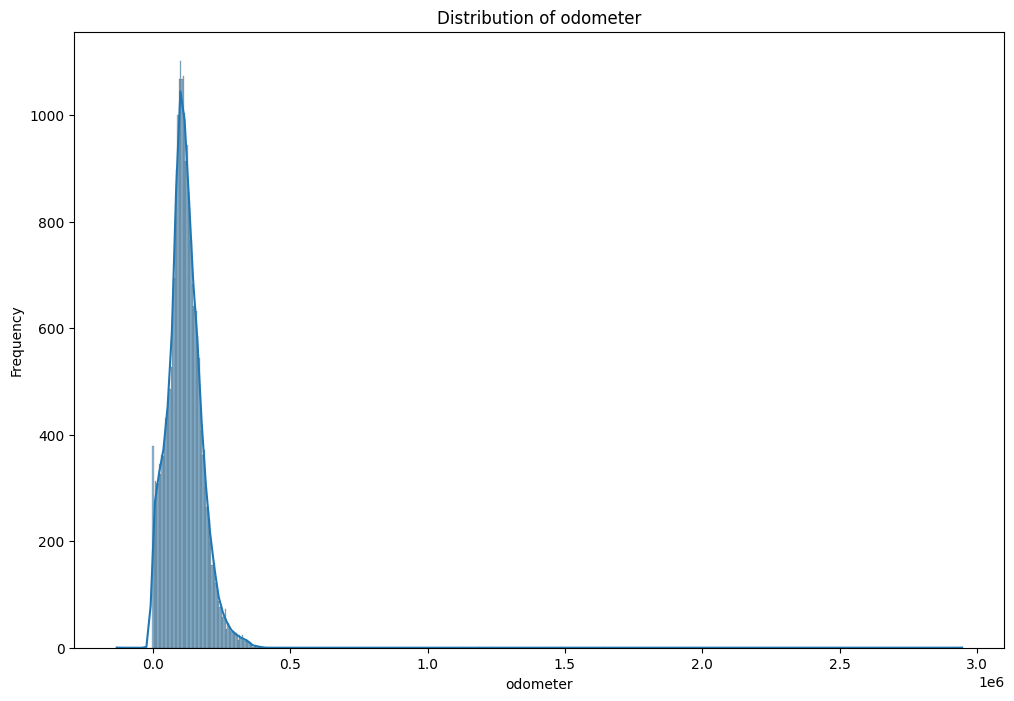

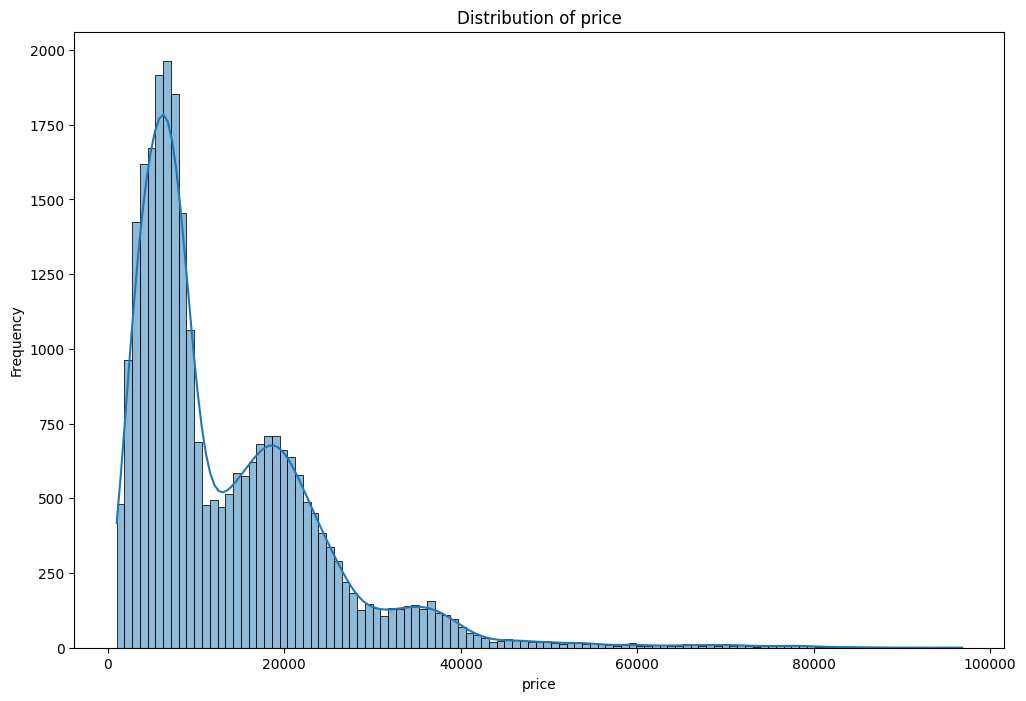

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for all plots
plt.rcParams["figure.figsize"] = [12, 8]

# Numeric columns for distribution analysis
numeric_columns = ['year', 'odometer', 'price']

# Categorical columns for distribution analysis
categorical_columns = ['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status',
                       'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

# Plotting numeric data
for col in numeric_columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
df[numeric_columns].describe()

,year,odometer,price
count,27532.000000,2.753200e+04,27532.000000
mean,2007.832958,1.160199e+05,13468.724829
std,15.758976,6.451642e+04,10962.149840
min,1921.000000,-1.318690e+05,1004.000000
25%,2005.000000,7.836775e+04,5759.000000
50%,2011.000000,1.114445e+05,9206.000000
75%,2014.000000,1.508562e+05,19128.000000
max,3017.000000,2.946000e+06,96818.000000


# year変数について

- 2000年前後のものが最も多い
- 最大値が3017年とおかしいことに。未来の年数のものは全て削除か？

# odometer変数について
- 総走行距離のこと。
- こちらも負の数字はおかしいので削除か？

# price変数について
- 今回の目的変数
- 価格帯は広範囲に及ぶ

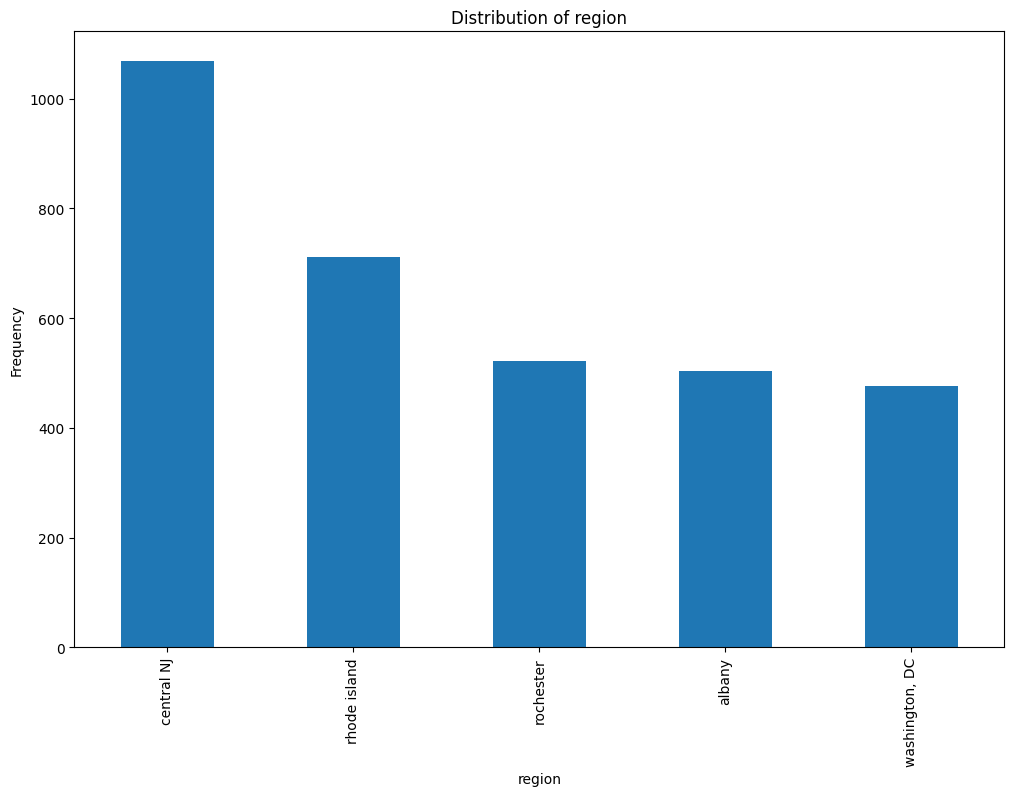

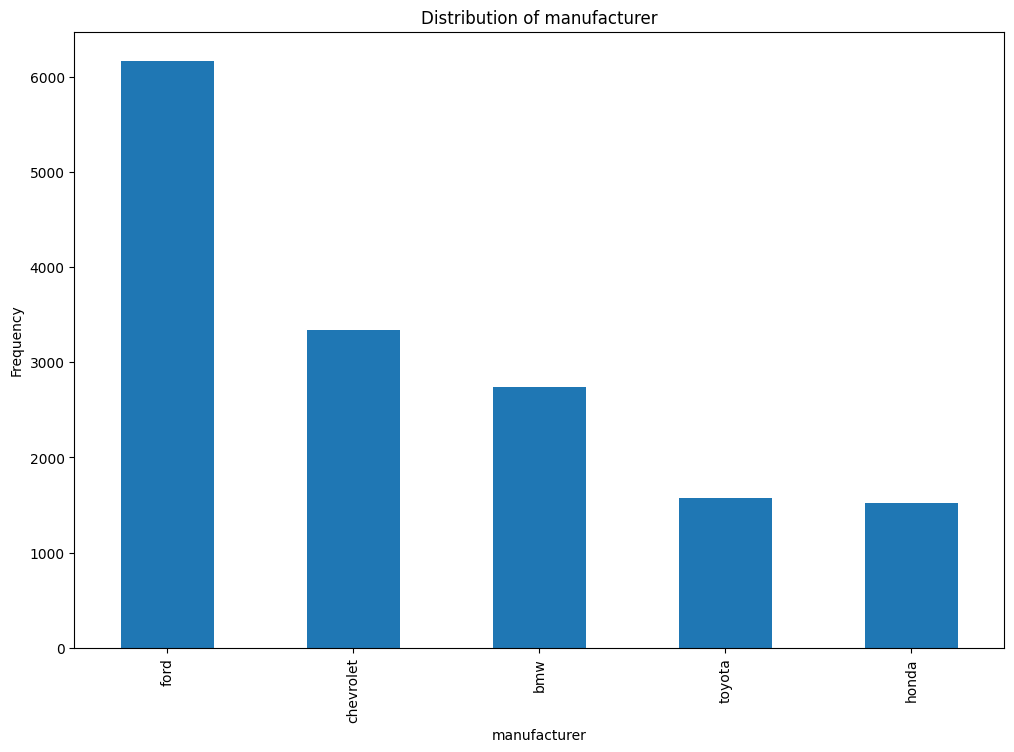

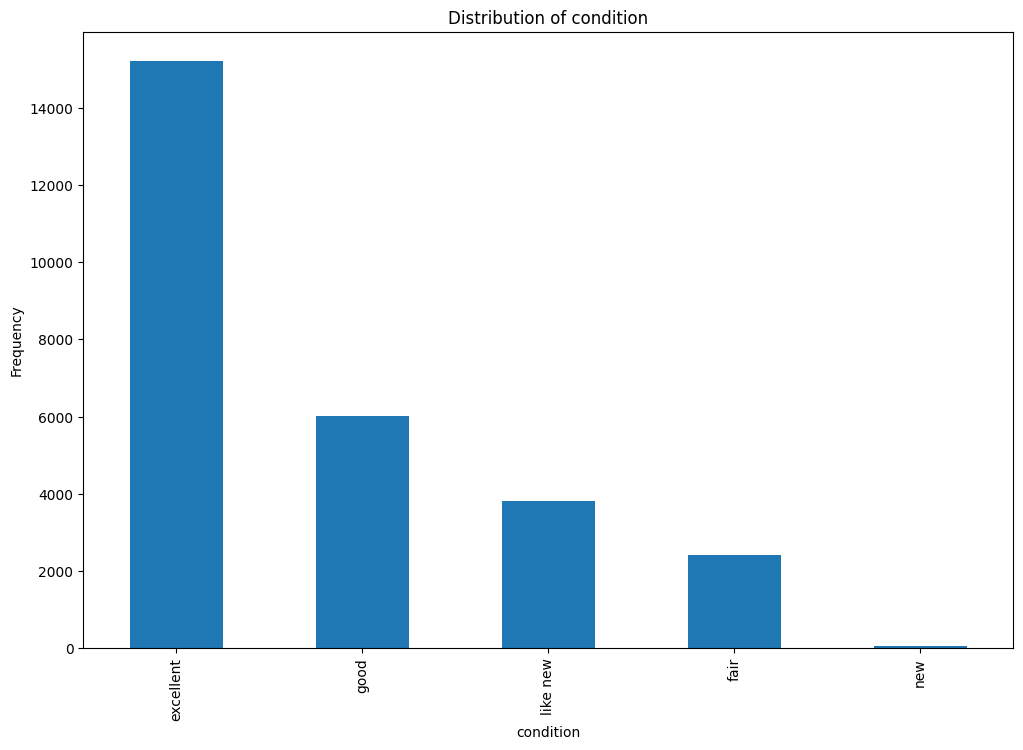

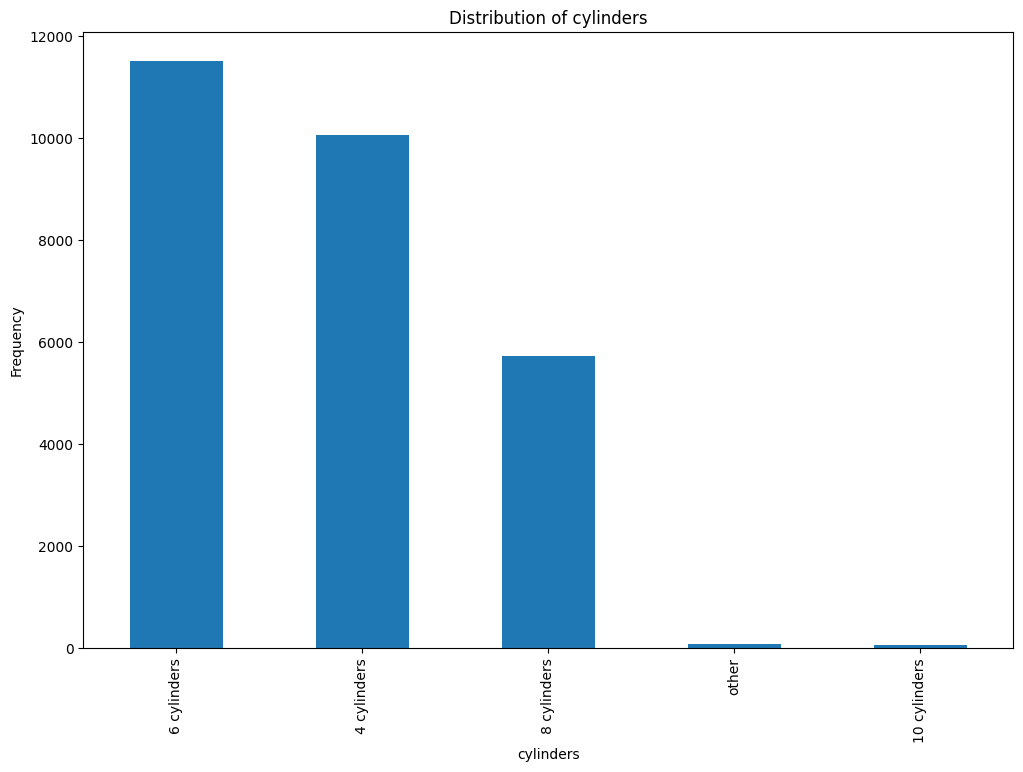

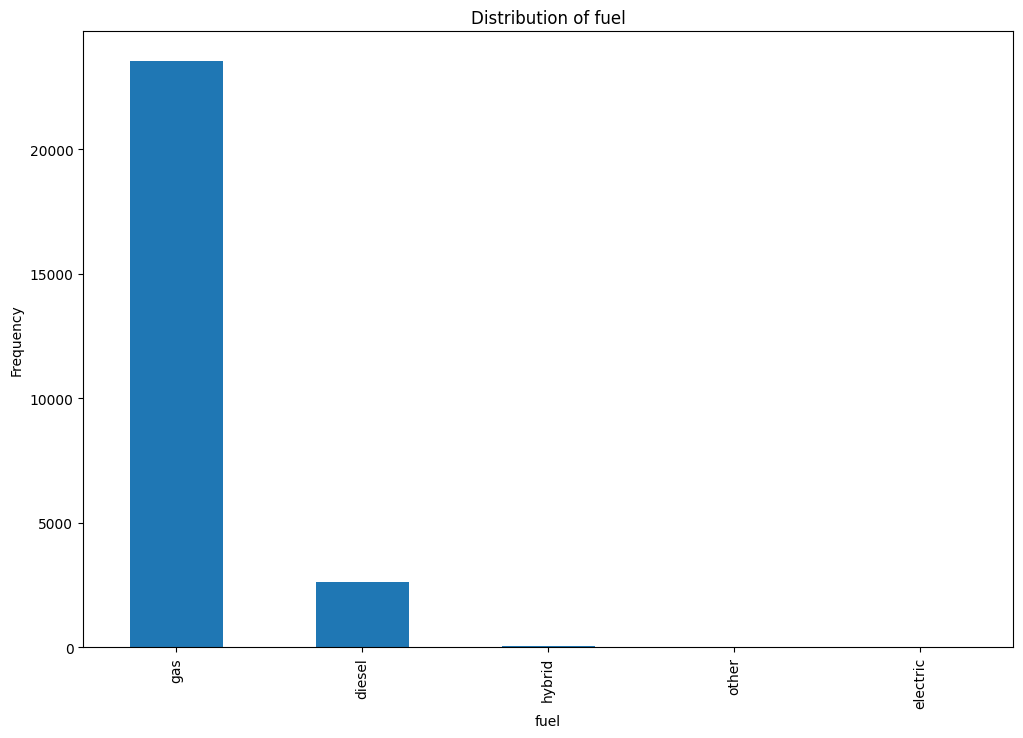

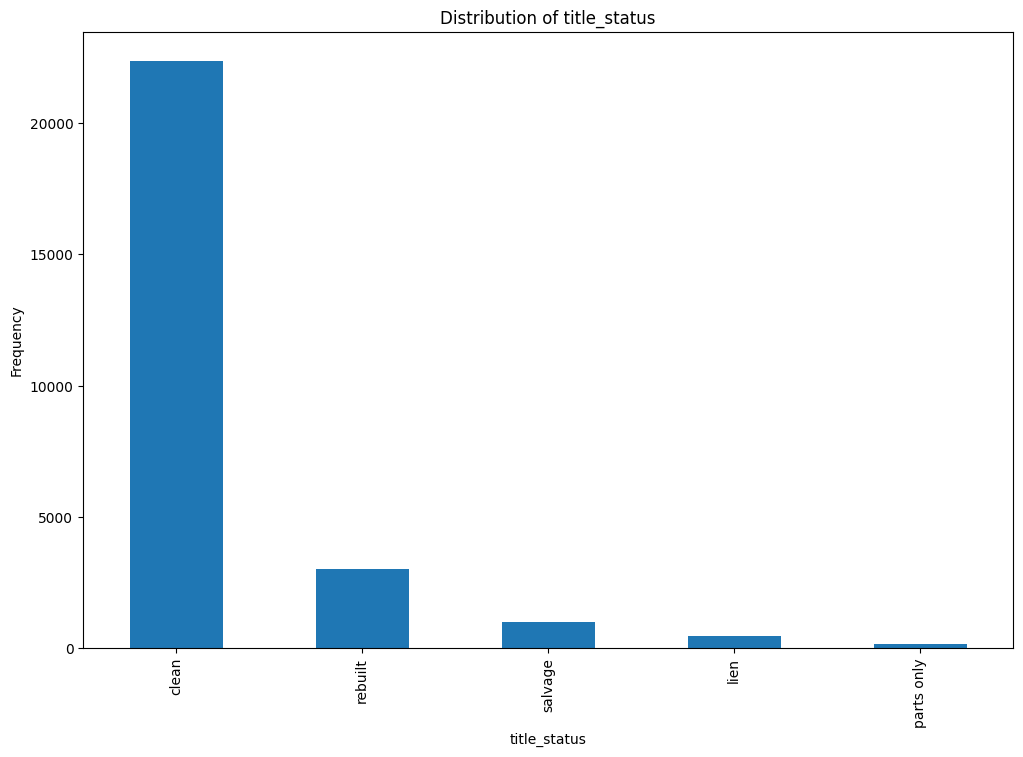

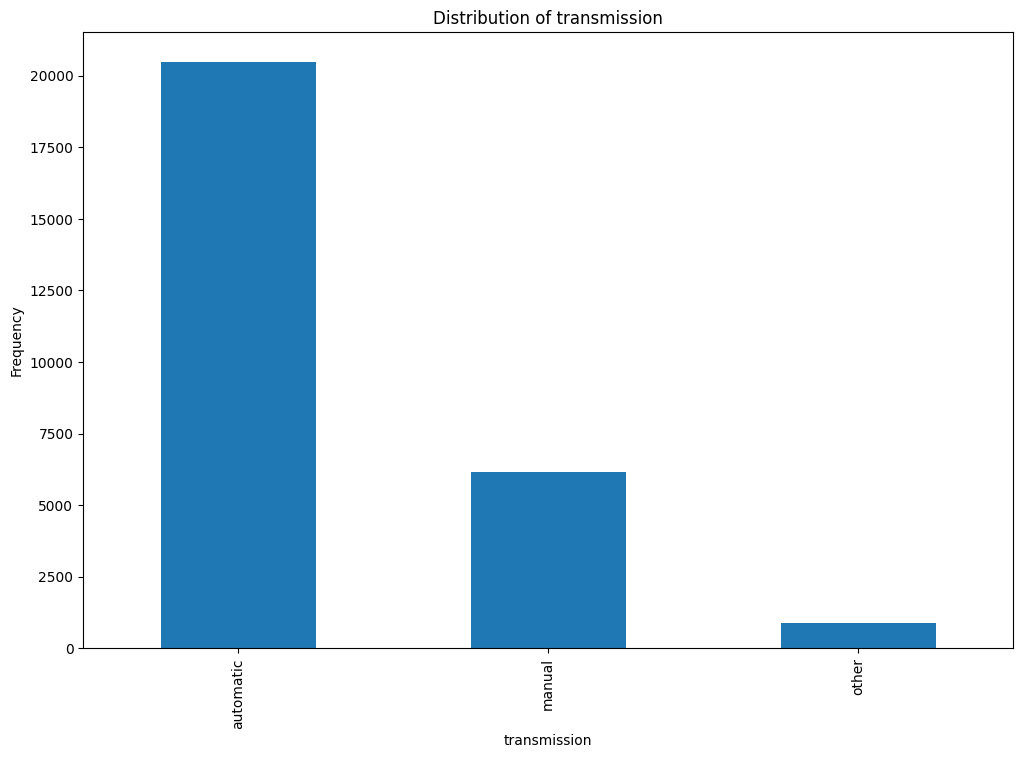

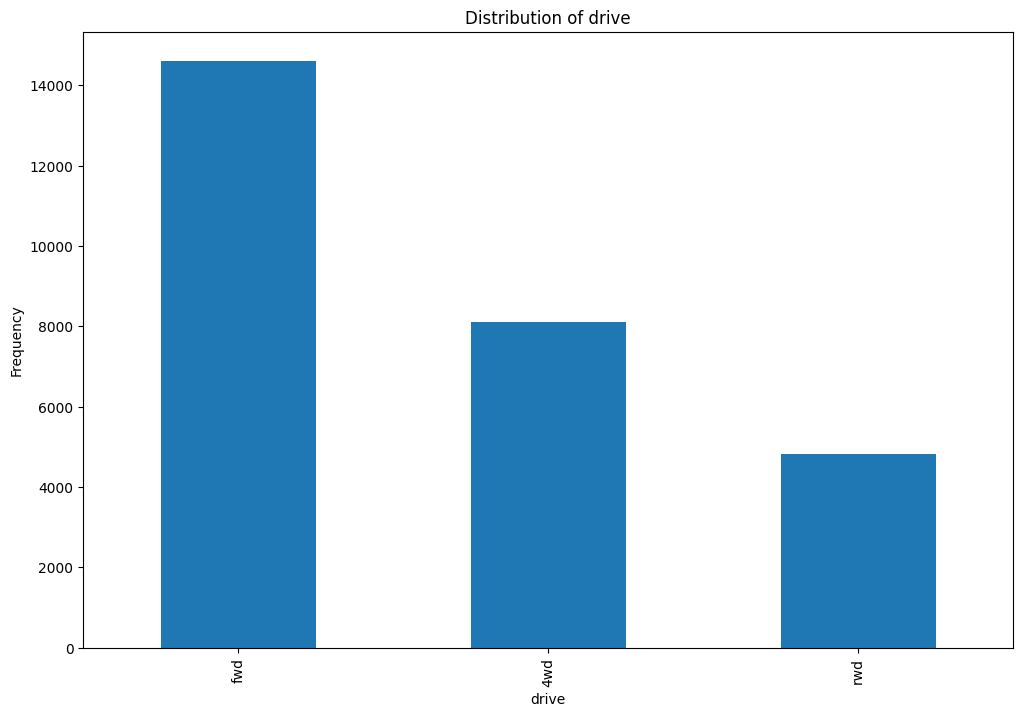

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


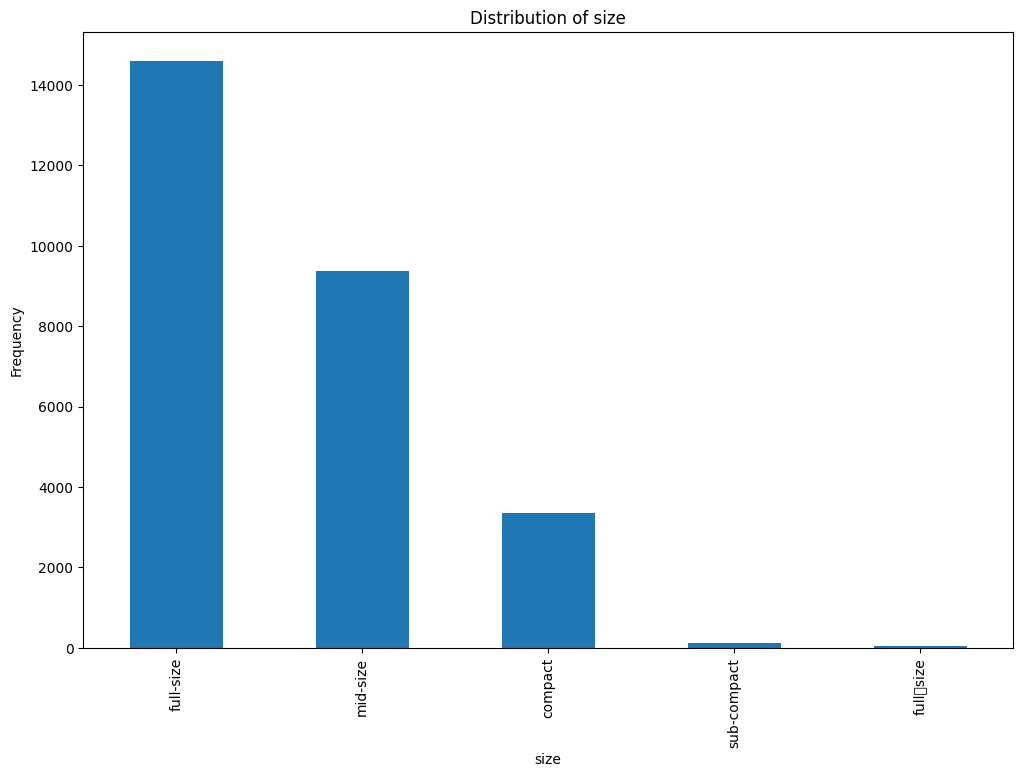

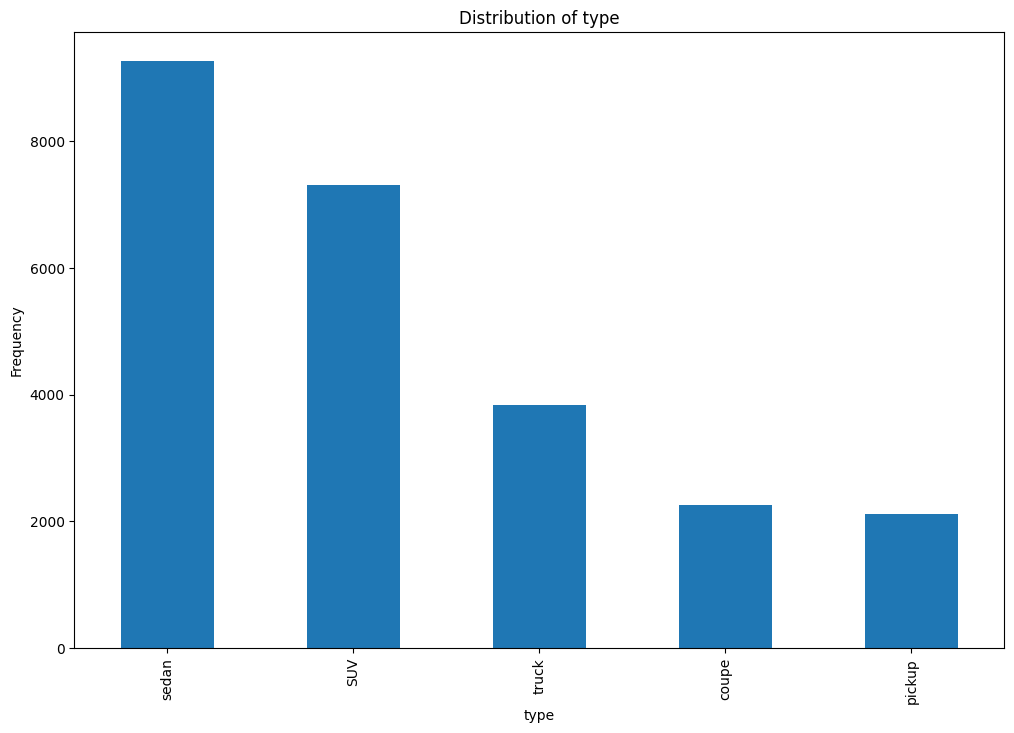

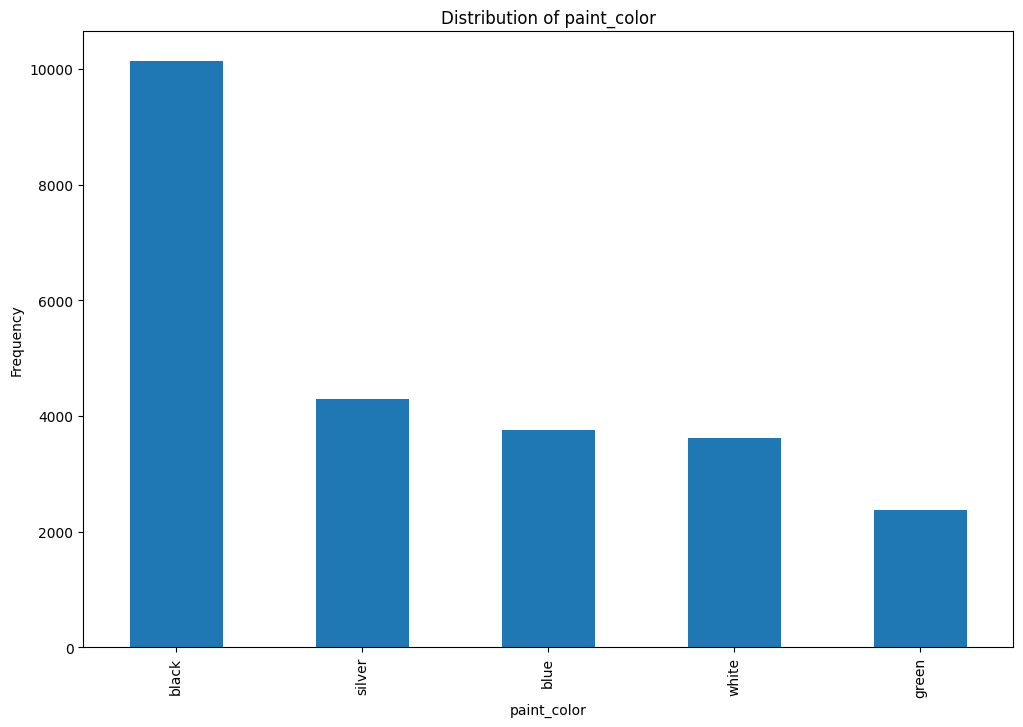

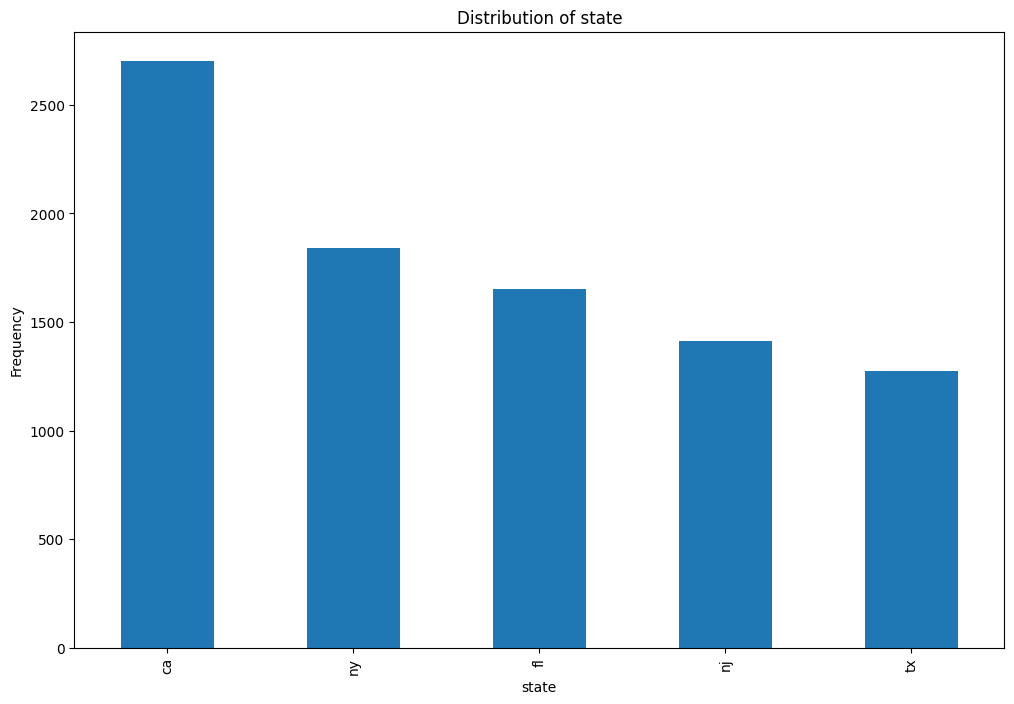

In [8]:
# Due to the large number of categories in some variables, we will display the top 10 categories for each variable
for col in categorical_columns:
    plt.figure()
    df[col].value_counts()[:5].plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# カテゴリー変数のEDA
- region(地域)、manufacture(製造会社)は非常に多岐におよぶが偏りはある。例えば製造元はFordが圧倒的に多い
- condition(車の状態)は、excellent, like nes, goodなで良いものが多い
- cylinder(気筒)の数。4-8が一般的。軽自動車は3が主流。大型車やスポーツカーは数が増えるのが一般的
- fuel(燃料)。gas, dieselがほとんど。EVはわずか
- title_statusはcondition同様cleanがほとんど
- transmissionはATがほとんど
- driveはいわゆる～駆のこと。前駆が多い。一般的に全駆は大型車などが多い
- sizeはfull、おそらく大型が多くアメリカらしい。特徴量に誤字が含まれている
- typeはセダンやSUVが多い
- paint color(色)は黒が多い
- state(州)。caはおそらくカリフォルニア？

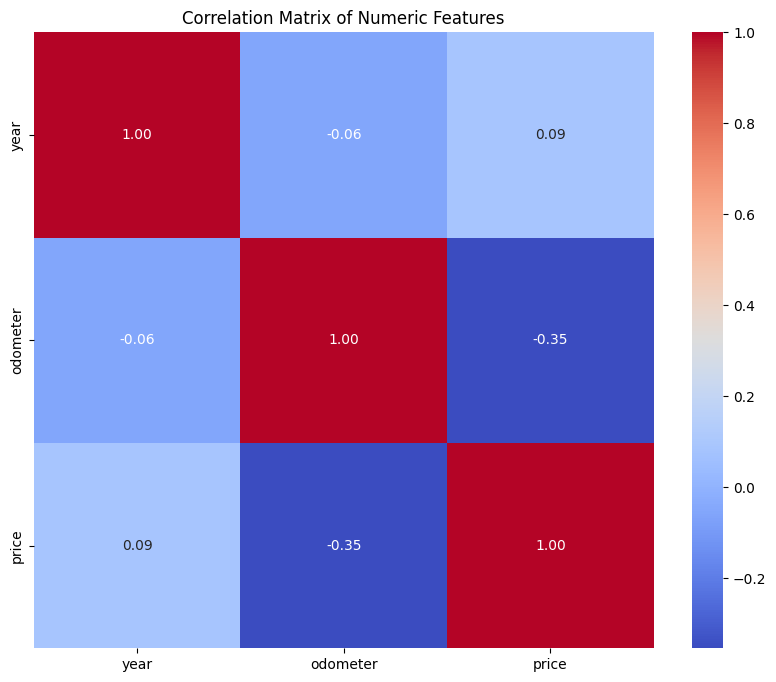

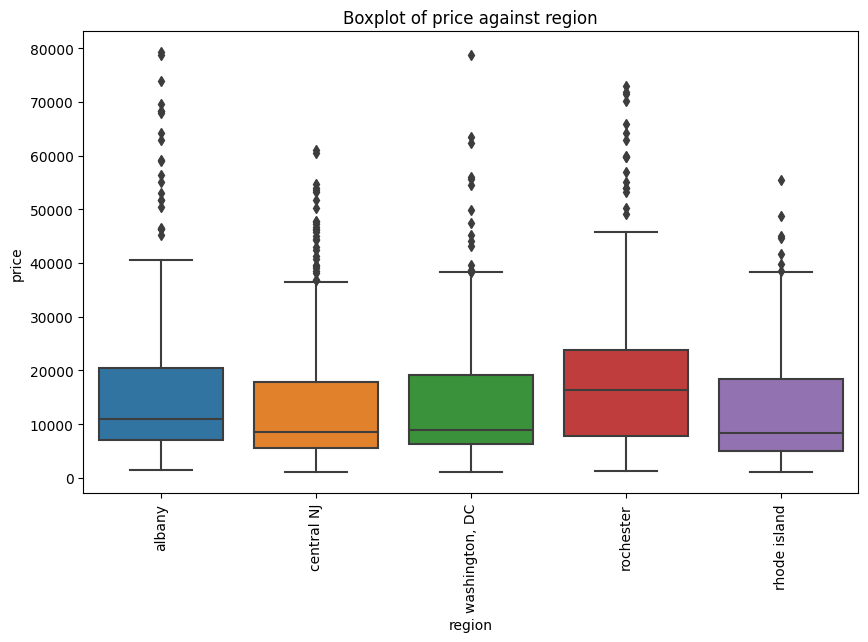

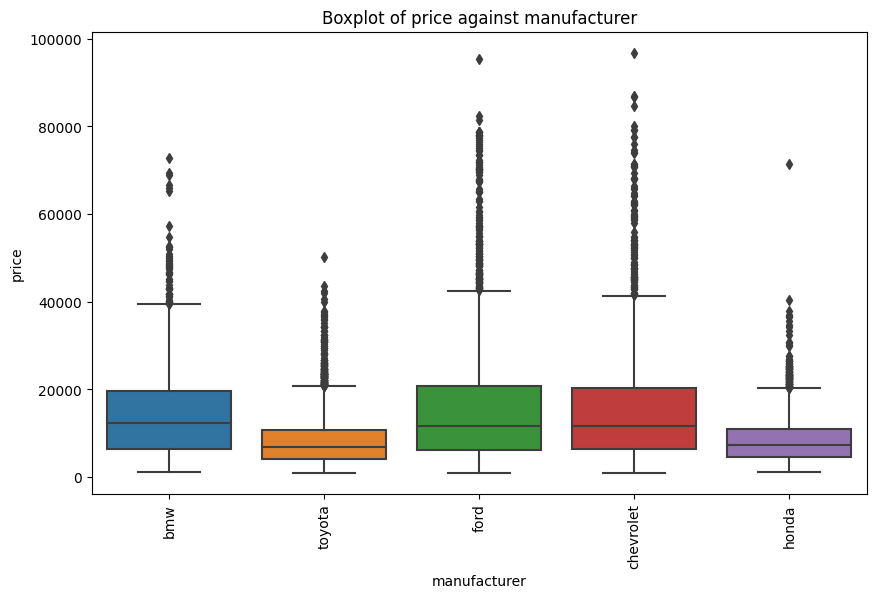

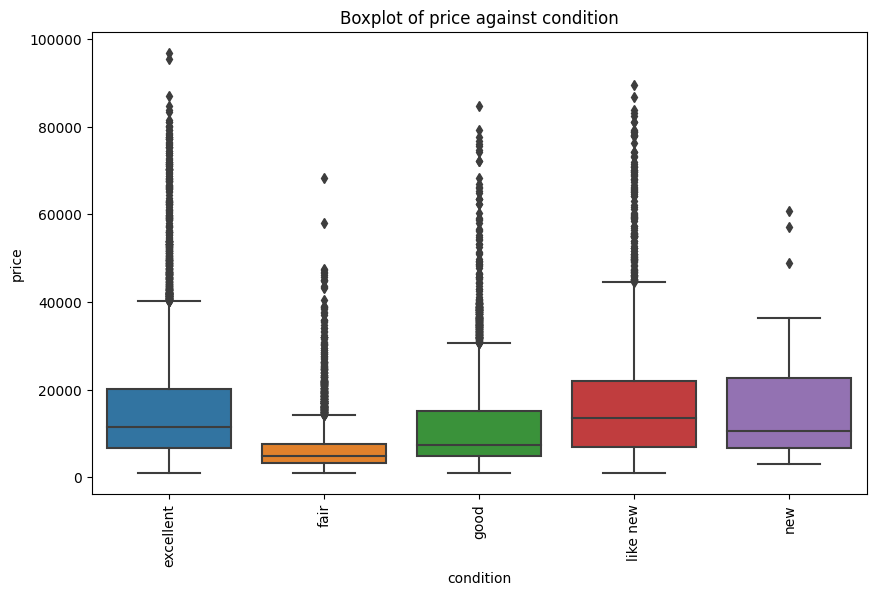

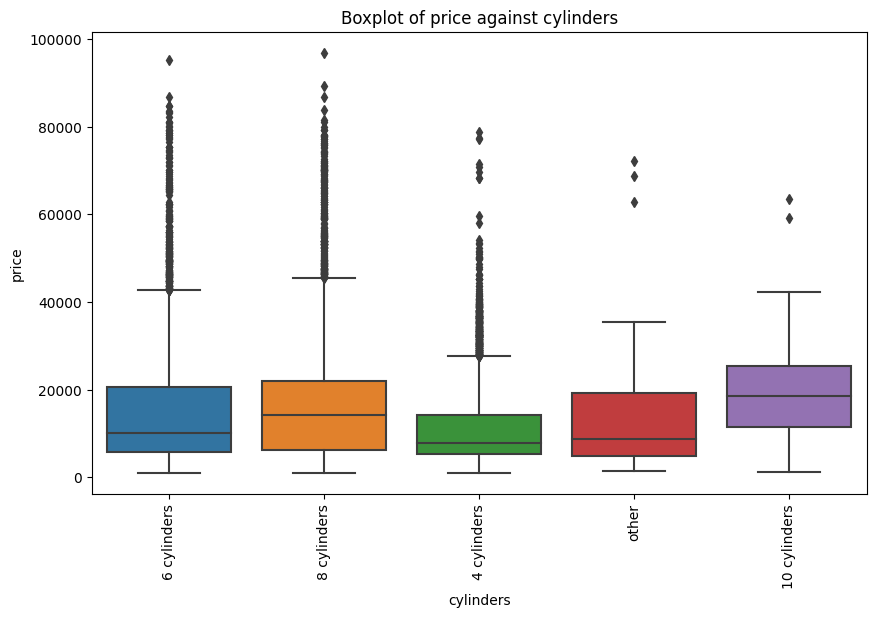

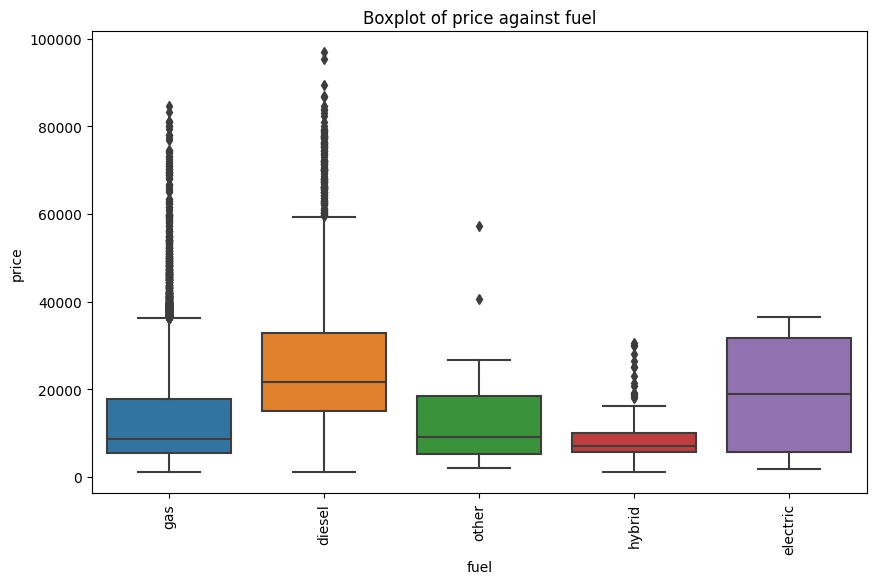

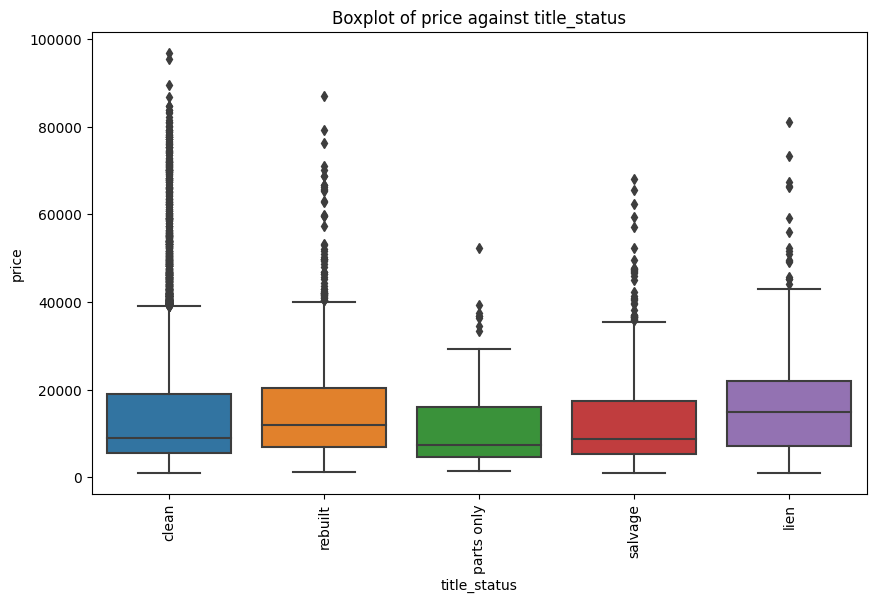

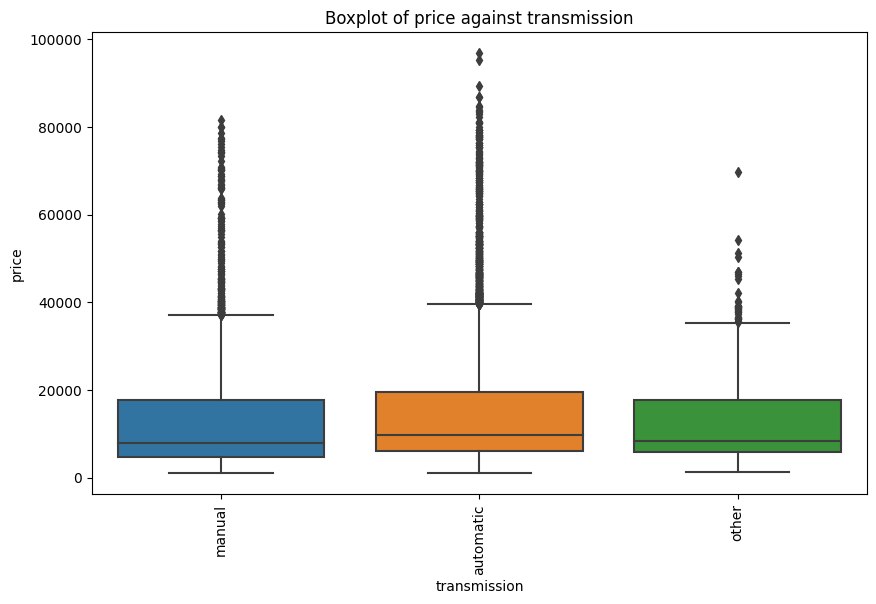

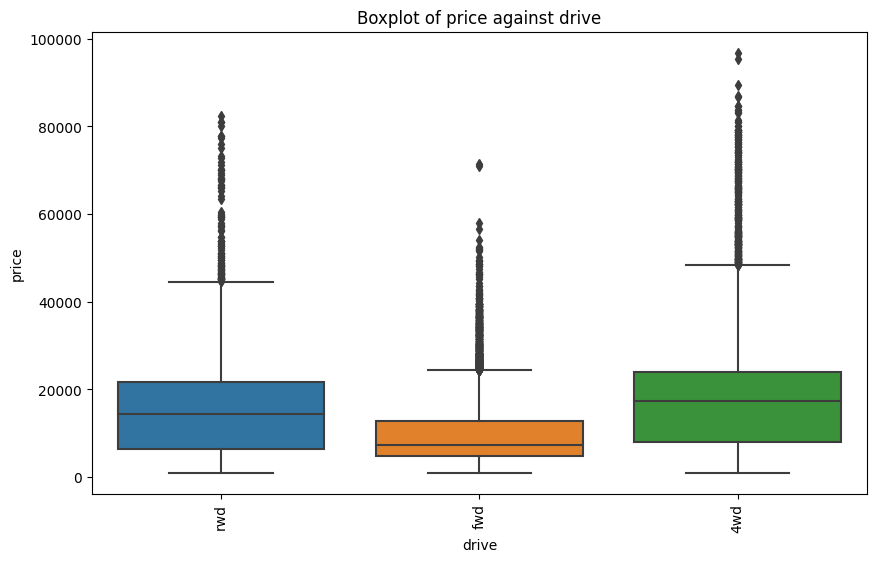

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


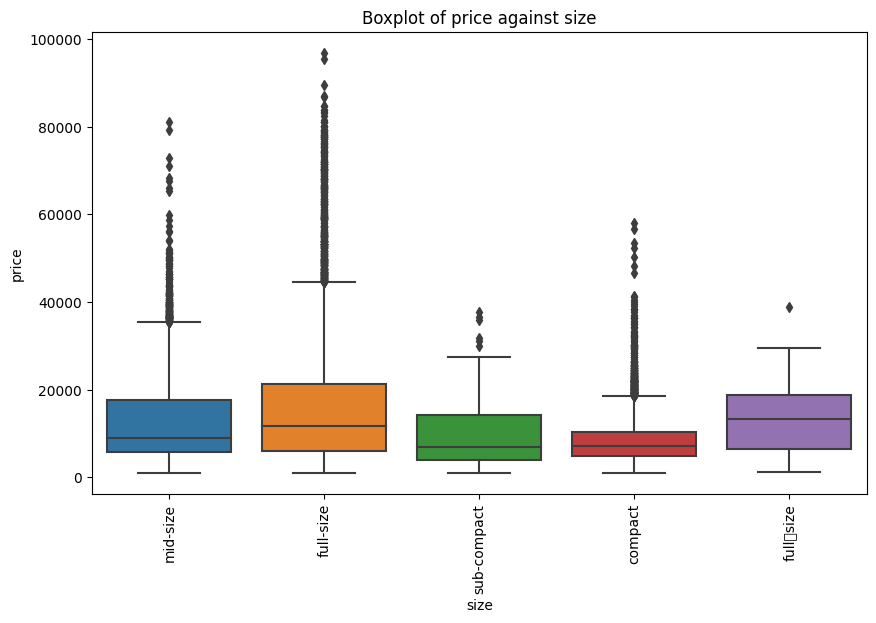

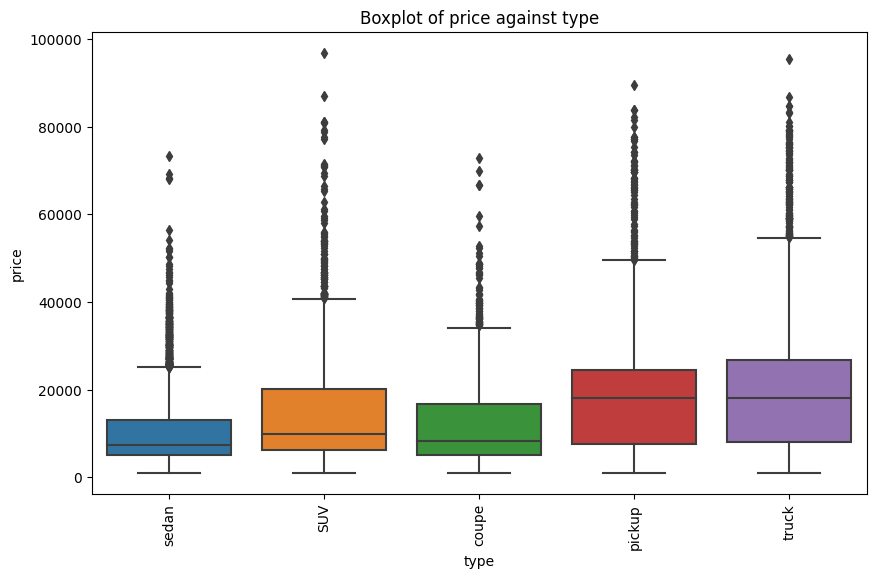

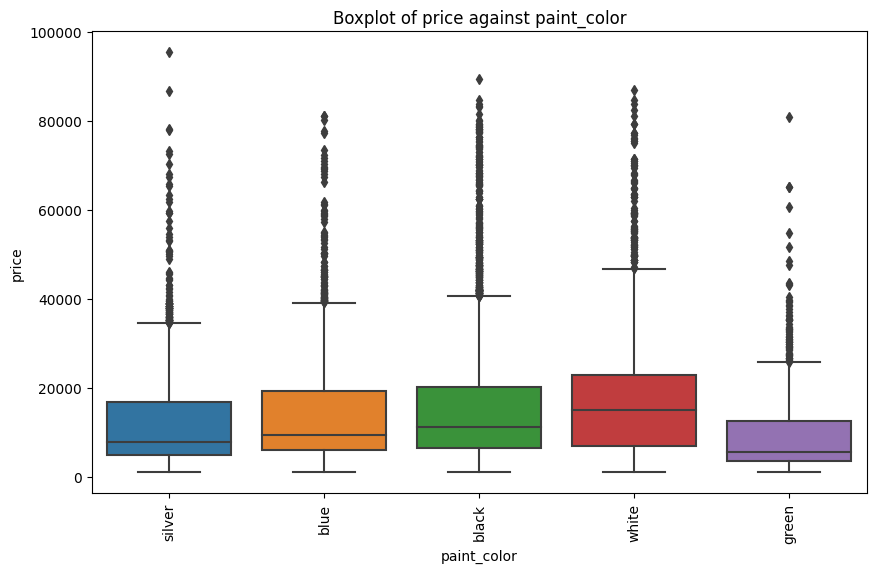

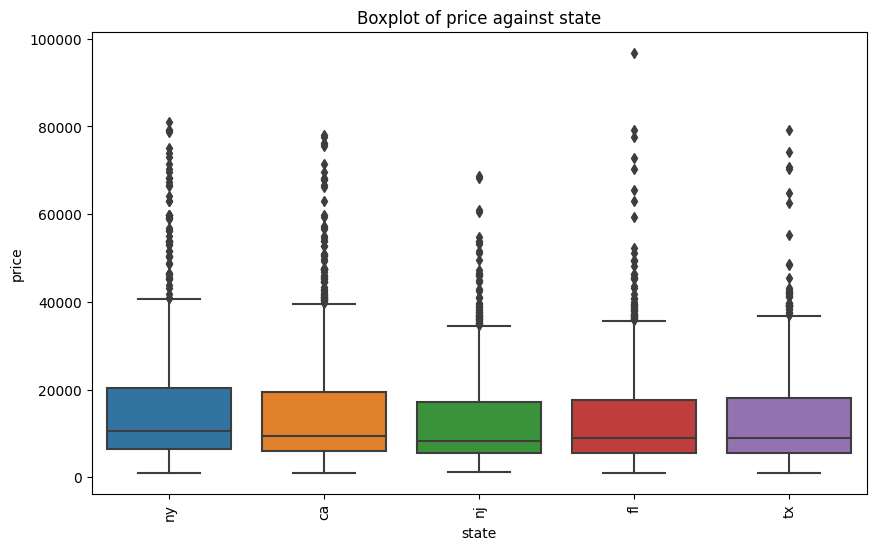

In [20]:
from pandas.core.api import DataFrame
# Let's check the correlation between numeric columns using a heatmap
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Boxplots for price against various categorical features
# For the sake of visibility, we will plot against the top 5 categories of each feature

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    top_categories = df[col].value_counts().index[:5]
    sns.boxplot(x=col, y='price', data=df[df[col].isin(top_categories)])
    plt.title(f'Boxplot of price against {col}')
    plt.xticks(rotation=90)
    plt.show()


# 数値変数とpriceの相関性
- 年数と価格の相関が強いことから新しいほど高い値段がつくわけではない。（古い車はプレミアがついたりするかも？これは年数と走行距離が弱い負の相関からも推察される）
- 走行距離が長いほど価格は下がる。これは直感的に当たり前。
-

# カテゴリー変数と価格帯(上位5つの変数についての分析)
- resion: オールバニー（ニューヨーク州）、ワシントンDCなど都心では高くなりやすそう
- manufacture: このグラフだと分かりづらいが、日本車は安く、Ford, chevroletなど人気車種や高級車は高い
- condition, title_status:当たり前だが良いほど高い
- cylinders: 多いほど高いが、10本は逆に安い。いったいどんな車に使用されているか調べる必要あり
- fuel: dieselが高い。EVはまだ普及していないせいか比較的安そう
- transmission:ATが人気
- drive, size, type: 大型は高い傾向にある。そのため全駆が高い
- 色はあまり関係なさそう
- 州によって値段は異なりそう